In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy
import seaborn as sns
import scipy
import sklearn

In [2]:
data = pd.read_csv('flights_NY.csv', index_col=0, delimiter=',')

In [3]:
# Удаление строк, содержащих нулевые значения
data2 = data.dropna ()
data2

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
year,,,,,,,,,,,,,
2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209
2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301
2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264


In [4]:
N = len(data2)

In [5]:
# Тип данных в колонках
data2.dtypes

month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time     float64
distance       int64
dtype: object

# 1. По каждой авиакомпании оцените вероятность того, что задержка прилета будет положительной и нарисуйте график, показывающий распределение этой вероятности по авиакомпаниям.
 

In [6]:
# Получение списка всех авиакомпаний
carrier_all = data2['carrier'].tolist()
carrier = []
for i in range(len(carrier_all)):
    if carrier_all[i] not in carrier:
        carrier.append(carrier_all[i])
carrier

['UA',
 'AA',
 'B6',
 'DL',
 'EV',
 'MQ',
 'US',
 'WN',
 'VX',
 'FL',
 'AS',
 '9E',
 'F9',
 'HA',
 'YV',
 'OO']

In [7]:
# Общее число положительных задержек
carrier_pos_all = data2[data2['arr_delay'] > 0]
len(carrier_pos_all)

# Список числа задержек по каждой авиакомпании
pos_delay_count = []
all_delay_count = []
for i in range(len(carrier)):
    carrier0 = data2[data2['carrier'].isin([carrier[i]])] 
    all_delay_count.append(len(carrier0)) # Число всех задержек
    
    carrier0_pos = carrier0[carrier0['arr_delay'] > 0]
    pos_delay_count.append(len(carrier0_pos)) # Число положительных задержек

In [8]:
task = pd.DataFrame({'carrier': carrier, 'pos_delay_count': pos_delay_count, 'all_delay_count': all_delay_count})
task['probability_whithin_carrier'] = task['pos_delay_count']/task['all_delay_count']
task['probability_between_carrier'] = task['pos_delay_count']/len(carrier_pos_all)
task

t = task.sort_values(by='probability_whithin_carrier', ascending=False)
t

,carrier,pos_delay_count,all_delay_count,probability_whithin_carrier,probability_between_carrier
9,FL,1895,3175,0.596850,0.014248
12,F9,392,681,0.575624,0.002947
4,EV,24484,51108,0.479064,0.184085
14,YV,258,544,0.474265,0.001940
5,MQ,11693,25037,0.467029,0.087915
7,WN,5304,12044,0.440385,0.039878
2,B6,23609,54049,0.436807,0.177506
0,UA,22222,57782,0.384583,0.167078
11,9E,6637,17294,0.383775,0.049901
6,US,7349,19831,0.370581,0.055254


Структура датасета t:  
carrier - код авиакомпании,  
pos_delay_count	- число положительных задержек,  
all_delay_count	- число всех задержек этой авиакомпании,  
probability_whithin_carrier - вероятность того, что задержка рейса этой авиакомпании окажется положительной,  
probability_between_carrier - вероятность, что положительая задержка,   произойдет именно в этой авиакомпании

Text(0.5, 0, 'Код авиакомпании')

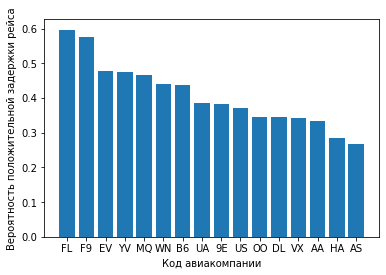

In [9]:
plt.bar(t['carrier'], t['probability_whithin_carrier'])
plt.ylabel("Вероятность положительной задержки рейса")
plt.xlabel("Код авиакомпании")

Наибольшая вероятность положительной задержки в авиакомпании FL

# 2. Постройте гистограмму расстояния перелета distance. Выделите на ней три группы перелетов: короткие, средние и длинные. Какие значения distance разумно выбрать в качестве границы, разделяющей короткие. средние и длинные перелеты? Куда летят самолеты в группе длинных перелетов? Найдите среднее время задержки вылета в каждой из трех выделенных групп. 


Text(0, 0.5, 'Число рейсов')

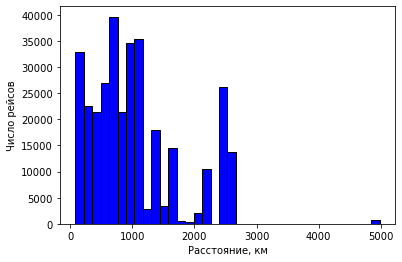

In [10]:
n_bins = len(data2)
plt.hist(data2['distance'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.xlabel("Расстояние, км")
plt.ylabel("Число рейсов")

In [11]:
distance_min = data2['distance'].min()
distance_max = data2['distance'].max()
rang = (distance_max - distance_min)/3 # Длина бина
print(distance_min, distance_max, rang)

80 4983 1634.3333333333333


In [12]:
# Верхние границы интервалов
short_d_int = distance_min + rang
middle_d_int = short_d_int + rang
long_d_int = middle_d_int + rang
print (short_d_int, middle_d_int, long_d_int)

1714.3333333333333 3348.6666666666665 4983.0


Короткие дистанции - от 80 до 1714.34  
Средние дистанции - от 1714.34 до 3348.67  
Длинные дистанции - выше 3348.67  

Text(0, 0.5, 'Число рейсов')

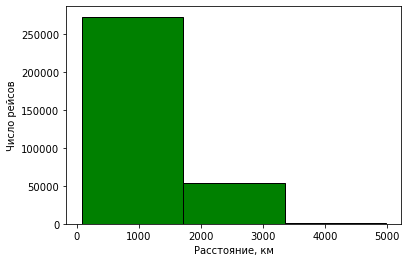

In [13]:
plt.hist(data2['distance'], color = 'green', edgecolor = 'black', bins = 3)
plt.xlabel("Расстояние, км")
plt.ylabel("Число рейсов")

In [14]:
short_d = data2[data2['distance'] < short_d_int]['dep_delay'].mean()

middle_d1 = data2[short_d_int <= data2['distance']]
middle_d2 = middle_d1[middle_d1['distance'] <= middle_d_int]['dep_delay'].mean()

long_d = data2[data2['distance'] > middle_d_int]['dep_delay'].mean()

print (short_d,  middle_d2, long_d)

12.916593451648803 10.75103330902018 9.355430183356841


Средняя задержка времени вылета в группе:  
    коротких перелетов 12,9 минут  
    средних перелетов 10,8 минут  
    дальних перелетов 9,4 минут  

In [15]:
airports = data2[data2['distance'] > middle_d_int]['dest'].unique()
airports

array(['HNL', 'ANC'], dtype=object)

В группе дальних перелетов самолеты летят в:  
HNL - Международный аэропорт Гонолулу, Гавайи  
ANC - Международный аэропорт Анкоридж, Аляска  

# 3. Нарисуйте график среднего времени задержки вылета по месяцам и отметьте на нем границы доверительных интервалов с уровнем доверия 0.95. С помощью подходящего статистического теста проверьте, можно ли принять гипотезу о равенстве средних в январе и феврале на уровне значимости 0.05? на уровне значимости 0.01? 


Так как распределение не известно, но выборка большая, можно предположить, что выборочное распределение выборочного среднего распределено нормально (ЦПТ). Следовательно можно рассчитать ассимптотический доверительный интервал.

In [16]:
m = data2['month'].unique()
months = m.tolist()
print(months)

[1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9]


In [17]:
import scipy.stats as st

In [18]:
mean = []
conf_int = []
conf_int_len = []
for i in range(len(months)):
    m = data2[data2['month'] == i+1]['dep_delay'].mean()
    mean.append(m)

    ci = st.norm.interval(alpha=0.95, loc=np.mean(data2[data2['month'] == i+1]['dep_delay']),  scale=st.sem(data2[data2['month'] == i+1]['dep_delay']))
    conf_int.append(ci)
    
    ci_len = (ci[1] - ci[0])/2
    conf_int_len.append(ci_len)
    
task3 = pd.DataFrame({'months': months, 'mean': mean, 'confidence interval': conf_int, 'conf_int_len': conf_int_len})
t3 = task3.sort_values(by='months', ascending=True)
t3    

,months,mean,confidence interval,conf_int_len
0,1,9.985491,"(9.547487811696357, 10.423494838504418)",0.438004
4,2,12.891709,"(12.433799324572384, 13.349619332993033)",0.457910
5,3,20.725614,"(20.114658064571547, 21.336570005603892)",0.610956
6,4,21.522179,"(20.925081131172433, 22.119276130341014)",0.597097
7,5,12.570524,"(12.1359701728788, 13.005078651714328)",0.434554
8,6,6.630285,"(6.207256308191644, 7.053313851008653)",0.423029
9,7,6.233175,"(5.889496796471599, 6.576853053273316)",0.343678
10,8,5.420340,"(5.0914608610352925, 5.749219870120394)",0.328880
11,9,16.482161,"(15.984561084051757, 16.979761639856463)",0.497600
1,10,10.760239,"(10.298906895459746, 11.221570847964928)",0.461332


Text(0, 0.5, 'Задержка вылета, мин')

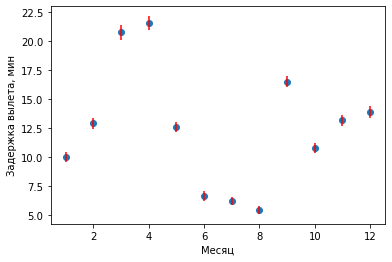

In [19]:
plt.figure()
plt.errorbar(t3['months'], t3['mean'], yerr=t3['conf_int_len'], fmt='o', ecolor='red', barsabove = True)
plt.xlabel("Месяц")
plt.ylabel("Задержка вылета, мин")

Для проверки равенства средних используется т-тест Проверка равенства дисперсии. Если отношение большей выборочной дисперсии к меньшей меньше 4, можно предположить равенство дисперсий генеральной совокупности.

In [20]:
disp_1 = np.var(data2[data2['month'] == 1]['dep_delay'])
disp_2 = np.var(data2[data2['month'] == 2]['dep_delay'])
print(disp_1, disp_2)

if disp_1 > disp_2:
    print(disp_1/ disp_2)
else:
    print(disp_2/disp_1)
          

1318.297956026133 1308.0577574966912
1.007828552272064


Отношение дисперсий близко к единице, можно применить двухвыборочный т-тест для выборок с одинаковой дисперсией.  
H0: mean1 = mean2  
H1: mean1 != mean2

In [21]:
st.ttest_ind(a=data2[data2['month'] == 1]['dep_delay'], b=data2[data2['month'] == 2]['dep_delay'], equal_var=True)

Ttest_indResult(statistic=-2.386498623322741, pvalue=0.017013366495100535)

Так как p-value = 0.017, что меньше уровня значимости 0.05.Принимаем альтернативную гипотезу H1, средние не равны.
При уровне значимости 0.01 не можем отвергнуть нулевую гипотезу H0, средние равны.

# 4. Найдите коэффициент корреляции между расстоянием distance и временем полета air_time. Постройте точечную диаграмму в осях distance (х) и air_time (y). Найдите коэффициенты линейной регрессии и нанесите полученную прямую на график. Как можно интерпретировать смысл коэффициентов полученной линейной модели?


In [22]:
corr = data2['distance'].corr(data2['air_time'])
print('Коэффициент кореляции равен', corr)

Коэффициент кореляции равен 0.9906496472248587


Text(0, 0.5, 'Время полета, мин')

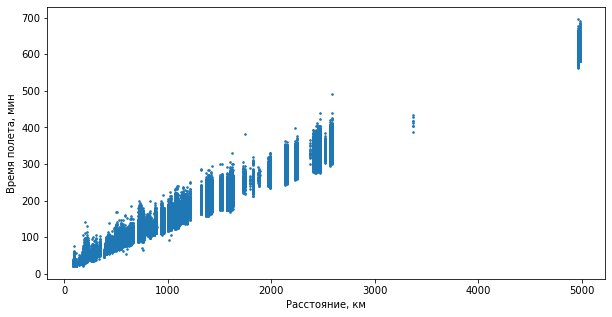

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(data2['distance'], data2['air_time'], s = 10, marker = ".")
plt.xlabel("Расстояние, км")
plt.ylabel("Время полета, мин")

Нахождение линейной регрессии основано на минимизации суммы квадратов разности между экспериментальным и предсказанным значением (метод наименьших квадратов).  
Уравнение: y = b0 + b1*x

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Вход (регрессор) - dictance, выход (предиктор) - air_time
x = np.array(data2['distance']).reshape((-1, 1))
y = np.array(data2['air_time'])

В первой модели зафиксировали  b0 = 0 (параметр fit_intercept LinearRegression равен False), так как при нулевой дистанции время в пути равно нулю.
Во второй модели коэфициент b0 вычисляется.


In [26]:
# Первая модель
model = LinearRegression(fit_intercept = False).fit(x, y) 

r_sq = model.score(x, y)
b0 = model.intercept_
b1 = model.coef_

print('R^2:', r_sq)
print('b0:', model.intercept_)
print('b1:', model.coef_)

R^2: 0.9685623574820708
b0: 0.0
b1: [0.13791948]


In [27]:
# Вторая модель
model2 = LinearRegression(fit_intercept = True).fit(x, y) 

r_sq_2 = model2.score(x, y)
b0_2 = model2.intercept_
b1_2 = model2.coef_

print('R^2:', r_sq_2)
print('b0:', model2.intercept_)
print('b1:', model2.coef_)

R^2: 0.9813867235467352
b0: 18.46657812775848
b1: [0.12611932]


In [28]:
lin_reg = b0 + b1*data2['distance']
lin_reg_2 = b0_2 + b1_2*data2['distance']

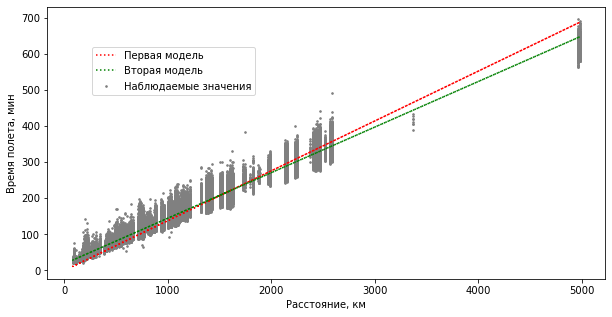

In [29]:
f = plt.figure(figsize=(10, 5))
plt.scatter(data2['distance'], data2['air_time'], s = 10, marker = ".", label = 'Наблюдаемые значения', color='grey')
plt.plot(data2['distance'], lin_reg, ':', label = 'Первая модель', color='red')
plt.plot(data2['distance'], lin_reg_2, ':', label = 'Вторая модель', color='green')
plt.xlabel("Расстояние, км")
plt.ylabel("Время полета, мин")
f.legend(loc = (0.15, 0.7))

In [30]:
# Вычисление приблизительной скорости самолета по второй модели
v = 1/(b1/60)
v

array([435.03644488])

1. R-квадрат обозначает какой процент вариации зависимой переменной можно объяснить значением независимой переменной. Чем больше значение R-квадрата, тем лучше независимые переменные способны предсказать значение зависимой переменной. 

    R-квадрат второй модели равен 0.98 (98% вариации времени полета объясняется изменением расстояния), первой модели - 0.97. Визуально, прямая второй модели точнее проходит через экспериментальные точки.
    

2. Коэффициент b0 - точка пересечения графика с осью OY (x=0). Во второй модели b0 = 18.5 минут. Можно предположить, что это минимальное время, затраченное на полет при приближении расстояния к нулю. Возможно это время взлета/посадки.


3. b1 = 0.13 (вторая модель), каждый километр самолет пролетает за 0.13 минут.   
    Ожидаемая скорость полета = 435 км/ч

# 5. Постройте нормированную гистограмму распределения задержки прилета по тем рейсам, которые вылетели в пределах +/-15 минут от времени в расписании. Сделайте предположение о том, каким распределением может описываться полученная гистограмма, оцените параметры этого распределения и нанесите график плотности на график с гистограммой. Вопрос со звездочкой (необязательный): с помощью подходящего статистического теста проверьте, можно ли принять гипотезу о выбранном распределении?


In [32]:
# Фильтрация по времени задержки вылета
df1 = data2[-15 <= data2['dep_delay']]
df2 = df1[df1['dep_delay'] <= 15]
df2

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
year,,,,,,,,,,,,,
2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209
2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301
2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264


Text(0, 0.5, 'Плотность распределения')

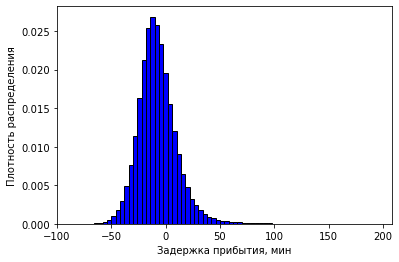

In [42]:
plt.hist(df2['arr_delay'], density=True, color = 'blue', edgecolor = 'black', bins = 70)
plt.xlabel("Задержка прибытия, мин")
plt.ylabel("Плотность распределения")

C:\Users\Dasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

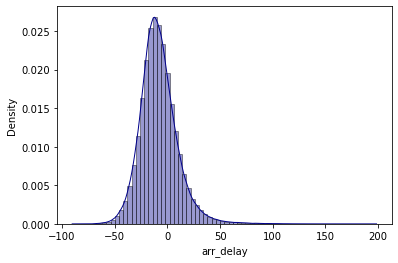

In [41]:
sns.distplot(df2['arr_delay'], hist=True, kde=True, 
             bins=70, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

Предположительно данные распределены по нормальному закону

Оценка параметров нормального распределения:  
Оценка максимального правдоподобия мат.ожидания = среднее выборки  
Оценка максимального правдоподобия дисперсии = сумма квадратов разности значения и xi и среднего, деленная на n - число элементов выборки 

In [60]:
# Оценка параметров нормального распределения
a_mle = df2['arr_delay'].mean()
d2_mle = (1/len(df2['arr_delay']))*sum(df2['arr_delay'] - df2['arr_delay'].mean())**2
print('a_mle:', a_mle)
print('d2_mle:', d2_mle)

a_mle: -8.251114540466393
d2_mle: 2.6971733058572895e-18
